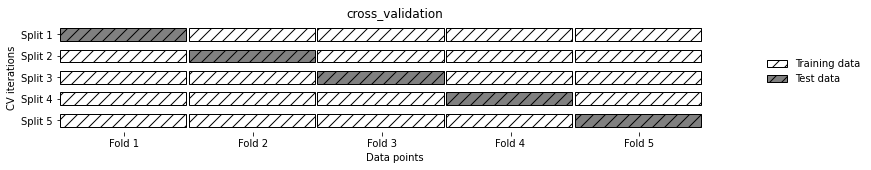

In [7]:
import os, warnings
import numpy as np
# 경고 메시지 무시하거나 숨길때(ignore), 다시보이게(default)
# warnings.filterwarnings(action='default')
warnings.filterwarnings(action='ignore')

import mglearn

mglearn.plots.plot_cross_validation()

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [9]:
iris = load_iris()
logreg = LogisticRegression()

In [10]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
from sklearn.model_selection import KFold

In [14]:
kfold = KFold(n_splits=3)
logreg = LogisticRegression()
score = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
score

array([0., 0., 0.])

In [19]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
score = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
score

array([0.98, 0.96, 0.96])

In [16]:
score = cross_val_score(logreg, iris.data, iris.target, cv=5)
score

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [17]:
score = cross_val_score(logreg, iris.data, iris.target, cv=7)
score

array([0.95454545, 1.        , 0.90909091, 0.95238095, 0.95238095,
       1.        , 1.        ])

In [20]:
kfold = KFold(n_splits=3, shuffle=True, random_state=1)
score = cross_val_score(logreg, iris.data, iris.target, cv=5)
score

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

(1797, 64)


<AxesSubplot:ylabel='count'>

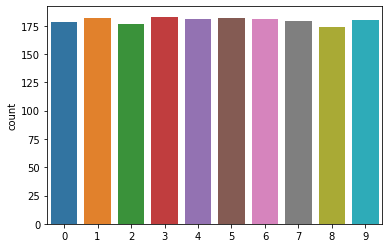

In [23]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)

sns.countplot(digits.target)

In [24]:
X = digits.data
y = digits.target ==9

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state=0)

In [26]:
type(y), np.unique(y)

(numpy.ndarray, array([False,  True]))

<AxesSubplot:ylabel='count'>

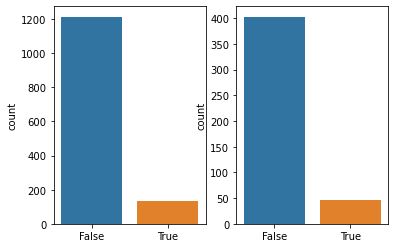

In [27]:
plt.subplot(1,2,1)
sns.countplot(y_train)

plt.subplot(1,2,2)
sns.countplot(y_test)

In [29]:
from sklearn.dummy import DummyClassifier
model = DummyClassifier(strategy='most_frequent')
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('예측 값 :', np.unique(pred))
print('학습용셋 정확도 :', model.score(X_train, y_train))
print('테스트셋 정확도 :', model.score(X_test, y_test))

예측 값 : [False]
학습용셋 정확도 : 0.9012620638455828
테스트셋 정확도 : 0.8955555555555555


In [30]:
model = DummyClassifier(strategy='stratified')
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('예측 값 :', np.unique(pred))
print('학습용셋 정확도 :', model.score(X_train, y_train))
print('테스트셋 정확도 :', model.score(X_test, y_test))

예측 값 : [False  True]
학습용셋 정확도 : 0.8010393466963622
테스트셋 정확도 : 0.8155555555555556


In [33]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred = model.predict(X_test)

print('예측 값 :', np.unique(pred))
print('학습용셋 정확도 :', model.score(X_train, y_train))
print('테스트셋 정확도 :', model.score(X_test, y_test))

예측 값 : [False  True]
학습용셋 정확도 : 0.9383815887156645
테스트셋 정확도 : 0.9177777777777778


In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.1).fit(X_train, y_train)
pred = model.predict(X_test)

print('예측 값 :', np.unique(pred))
print('학습용셋 정확도 :', model.score(X_train, y_train))
print('테스트셋 정확도 :', model.score(X_test, y_test))

예측 값 : [False  True]
학습용셋 정확도 : 0.9977728285077951
테스트셋 정확도 : 0.9844444444444445


In [36]:
from sklearn.metrics import confusion_matrix

model = LogisticRegression(C=0.1).fit(X_train, y_train)
pred = model.predict(X_test)

matrix = confusion_matrix(y_test, pred)
print("오차 행렬 : \n{}".format(matrix))

오차 행렬 : 
[[402   1]
 [  6  41]]


In [37]:
# 정확도
# 모든 샘플중에 정확에게 예측한 비율
TP+TN/(TP+TN+FP+FN)
# 정밀도
# 예측을 양성으로 한 것중에 잘 예측한 비율
TP/TP+FP

# 민감도(재현률)
# 실제 양성인 것중에서 잘 예측한 비율
TP/TP+FN

# 특이도
# 실제 음성인 것중에 잘 예측한 비율

# FPRate(가짜 양성 비율)
# 실제 음성인 데이터 중에 예측을 실패한 비율

* 정밀도/민감도(재현율)
* F = 2 *(정밀도*재현율)/ (정밀도-+재현율)

In [39]:
from sklearn.metrics import f1_score

In [40]:
### 빈도기반 모델
model = DummyClassifier(strategy='most_frequent')
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("예측 값 : ", np.unique(pred))

print("학습용셋 정확도 : ", model.score(X_train, y_train))
print("테스트셋 정확도 : ", model.score(X_test, y_test))
print('F1 score :', f1_score(y_test, pred))

예측 값 :  [False]
학습용셋 정확도 :  0.9012620638455828
테스트셋 정확도 :  0.8955555555555555
F1 score : 0.0


In [41]:
model = LogisticRegression(C=0.1).fit(X_train, y_train)
pred = model.predict(X_test)

print('예측 값 :', np.unique(pred))
print('학습용셋 정확도 :', model.score(X_train, y_train))
print('테스트셋 정확도 :', model.score(X_test, y_test))
print('F1 score :', f1_score(y_test, pred))

예측 값 : [False  True]
학습용셋 정확도 : 0.9977728285077951
테스트셋 정확도 : 0.9844444444444445
F1 score : 0.9213483146067415


In [42]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred = model.predict(X_test)

print('예측 값 :', np.unique(pred))
print('학습용셋 정확도 :', model.score(X_train, y_train))
print('테스트셋 정확도 :', model.score(X_test, y_test))
print('F1 score :', f1_score(y_test, pred))

예측 값 : [False  True]
학습용셋 정확도 : 0.9383815887156645
테스트셋 정확도 : 0.9177777777777778
F1 score : 0.5542168674698795


In [1]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n{}".format(confusion))

NameError: name 'X_train' is not defined